В цьому домашньому завданні ми побудуємо рішення задачі логістичної регресії і створимо ваш перший submission на змагання на Kaggle. Усі кроки були розглянуті в лекції та містяться в ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb`, але тепер ми їх адаптуємо до іншої задачі - все як в реальному житті, коли ви знайшли код у відкритих джерелах і адаптуєте на проєкті 😉

**Погнали! 🚀🚀🚀**

-----------



0. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle - шукайте посилання в уроці [Запрошення до участі у Kaggle-змаганні.](https://data-loves.kwiga.com/courses/machine-learning-dlia-liudei/domashnie-zavdannia-zmagannia-z-kaggle) Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

1. Зчитайте дані `train.csv` в pandas dataframe та розбийте їх на train і validation піднабори.

  * Є такий параметр в методі train_test_split як stratified. Можливо він буде Вам корисним при розбитті даних в цій задачі. Пропоную Вам почитати про нього в документації і спробувати скористатись.

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, f1_score, classification_report
import numpy as np
from sklearn.metrics import accuracy_score
import joblib

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
file_id_1 = '1qMJwlG35CALi-t58h1s-M9eWNE1PSjZA'
url = f'https://drive.google.com/uc?id={file_id_1}'
raw_df = pd.read_csv(url)

print("Розподіл класів у всьому наборі даних:")
print(raw_df['Exited'].value_counts(normalize=True))
print("-" * 30)

train_df, val_df = train_test_split(
    raw_df,
    test_size=0.2,
    random_state=42,
    stratify=raw_df['Exited']
)

print(f"Розмір навчального набору: {train_df.shape}")
print(f"Розмір валідаційного набору: {val_df.shape}")

print("\nРозподіл класів у Train:")
print(train_df['Exited'].value_counts(normalize=True))

print("\nРозподіл класів у Validation:")
print(val_df['Exited'].value_counts(normalize=True))

Розподіл класів у всьому наборі даних:
Exited
0.0    0.796533
1.0    0.203467
Name: proportion, dtype: float64
------------------------------
Розмір навчального набору: (12000, 14)
Розмір валідаційного набору: (3000, 14)

Розподіл класів у Train:
Exited
0.0    0.7965
1.0    0.2035
Name: proportion, dtype: float64

Розподіл класів у Validation:
Exited
0.0    0.796667
1.0    0.203333
Name: proportion, dtype: float64


In [73]:
raw_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,15807989.0,Ch'iu,585.0,France,Male,33.0,3.0,0.00,1.0,1.0,0.0,54191.38,0.0
14996,14996,15731781.0,Ch'ang,678.0,France,Male,34.0,6.0,0.00,2.0,1.0,1.0,53437.10,0.0
14997,14997,15667093.0,Goliwe,678.0,France,Female,54.0,4.0,0.00,1.0,1.0,0.0,147720.29,1.0
14998,14998,15732644.0,Fanucci,705.0,Spain,Female,40.0,7.0,0.00,2.0,1.0,0.0,149550.95,0.0


In [74]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


2. Визначіть назви колонок, які сформують вхідні незалежні дані, в змінній `input_cols` та назву колонки , яка є цільовою, в змінній `target_col`. Використовуючи `input_cols` та `target_col` створіть набори даних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` - де `inputs` - вхідні дані (датафрейм), `targets` - дані цільової колонки відповідного піднабору.

In [75]:
target_col = 'Exited'

cols_to_drop = [target_col, 'id', 'CustomerId', 'Surname']
input_cols = [col for col in train_df.columns if col not in cols_to_drop]

train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()
print(f"Вхідні ознаки: {input_cols}")

Вхідні ознаки: ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


3. Визначіть з допомогою `pandas.DataFrame.select_dtypes` назви колонок, які є числовими і категоріальними. Запишіть результати в `numeric_cols` та `categorical_cols` відповідно.

In [76]:
numeric_cols = train_inputs.select_dtypes(include=['number']).columns.tolist()
categorical_cols = train_inputs.select_dtypes(include=['object']).columns.tolist()

print(f"\nЧислові колонки: {numeric_cols}")
print(f"Категоріальні колонки: {categorical_cols}")


Числові колонки: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Категоріальні колонки: ['Geography', 'Gender']


4. Зробіть підготовку даних в категоріальних і числових колонках для входу в модель виходячи з освоєного на даний момент на курсі. Варіанти пеердобробки, з якими ми вже знайомі:
  - масштабування числових ознак,
  - заповнення пропущених значень, якщо вони є,
  - кодування категоріальних ознак, вилучення ознак, якщо ми вважаємо, що ці дані нерелевантні для моделі аби ми не бачимо способу як їх так закодувати, аби подати на вхід моделі.

  Тут є багато варіантів, як Ви побудуєте передобробку, важливо аби
  1) передобробка мала сенс (немає сенсу заповнювати дані константою, яку ми не зрозуміло звідки взяли)   
  2) має бути виконана принаймні одна дія передобробки
  3) обробка маэ бути виконана коректно і для тренувальних, і для вал. даних
  4) чим вищий у Вас врешті вийде ROС AUC скор, тим більше шансів перемогти у змаганні :)

  Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите? По завершенню виведіть по 5 значен з `train_inputs`, `val_inputs` використовуючи `display()`.

In [77]:
imputer = SimpleImputer(strategy='mean').fit(train_inputs[numeric_cols])
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])

scaler = MinMaxScaler().fit(train_inputs[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

print(f"Додано нові колонки: {encoded_cols}")
print(f"train_inputs: {train_inputs.shape}")
display(train_inputs.head())
display(val_inputs.head())

Додано нові колонки: ['Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']
train_inputs: (12000, 15)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7180,0.599045,France,Male,0.214286,0.1,0.626382,0.000000,1.0,1.0,0.719772,1.0,0.0,0.0,0.0,1.0
10393,0.603819,France,Female,0.375000,0.2,0.848836,0.000000,1.0,0.0,0.727603,1.0,0.0,0.0,1.0,0.0
80,0.653938,Germany,Male,0.303571,0.6,0.554522,0.333333,1.0,0.0,0.872180,0.0,1.0,0.0,0.0,1.0
3365,0.568019,Spain,Male,0.714286,0.0,0.000000,0.333333,0.0,1.0,0.257797,0.0,0.0,1.0,0.0,1.0
12236,0.658711,France,Male,0.053571,0.3,0.000000,0.333333,1.0,1.0,0.742837,1.0,0.0,0.0,0.0,1.0


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6490,0.675418,Germany,Male,0.500000,0.1,0.551870,1.000000,1.0,1.0,0.364704,0.0,1.0,0.0,0.0,1.0
3646,0.386635,France,Male,0.410714,0.5,0.000000,0.333333,1.0,1.0,0.190942,1.0,0.0,0.0,0.0,1.0
5306,0.715990,France,Female,0.357143,0.2,0.000000,0.333333,0.0,1.0,0.584853,1.0,0.0,0.0,1.0,0.0
652,0.577566,France,Female,0.446429,0.4,0.742441,0.000000,0.0,1.0,0.558109,1.0,0.0,0.0,1.0,0.0
2627,0.589499,Spain,Female,0.214286,0.4,0.000000,0.333333,1.0,0.0,0.718420,0.0,0.0,1.0,1.0,0.0


5. Збережіть дані, що містяться в змінних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` на диск в форматі `parquet`. В кінці виведіть список файлів в папці, в яку Ви зберегли файли і перевірте, чи файли збереглись. Вивести список файлів можна з `os.listdir(your_dir)` або `!ls your_dir`

In [78]:
save_path = '/content/drive/MyDrive/Colab Notebooks/parquet'

train_inputs.to_parquet(os.path.join(save_path, 'train_inputs.parquet'))
val_inputs.to_parquet(os.path.join(save_path, 'val_inputs.parquet'))

pd.DataFrame(train_targets).to_parquet(os.path.join(save_path, 'train_targets.parquet'))
pd.DataFrame(val_targets).to_parquet(os.path.join(save_path, 'val_targets.parquet'))

os.listdir(save_path)

['train_inputs.parquet',
 'val_inputs.parquet',
 'train_targets.parquet',
 'val_targets.parquet',
 'bank_model.joblib']

6. З підготовлених вхіжних даних створіть `X_train`, `X_val` набори, які містять лише колонки, які підуть на вхід моделі. Навчіть модель бінарної класифікації з допомогою `LogisticRegression` в `scikit-learn`.

In [79]:
X_cols = numeric_cols + encoded_cols
X_train = train_inputs[X_cols]
X_val = val_inputs[X_cols]

model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, train_targets)

train_probs = model.predict_proba(X_train)[:, 1]
val_probs = model.predict_proba(X_val)[:, 1]

train_auc = roc_auc_score(train_targets, train_probs)
val_auc = roc_auc_score(val_targets, val_probs)

print(f"На тренувальних даних: {train_auc:.4f}")
print(f"На валідаційних даних: {val_auc:.4f}")

На тренувальних даних: 0.8824
На валідаційних даних: 0.8797


7. Виведіть Confusion matrix, ROC Curve, метрику AUROC та метрику F1 Score для порога класифікації 0.5 для побудованої моделі на тренувальних та валідаційних даних. Що можете сказати про якіст моделі? Вона хороша, погана, задовільна?

Метрики для Train
AUROC: 0.8824
F1 Score: 0.6352

Детальний звіт класифікації:
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92      9558
         1.0       0.78      0.54      0.64      2442

    accuracy                           0.87     12000
   macro avg       0.83      0.75      0.78     12000
weighted avg       0.87      0.87      0.87     12000



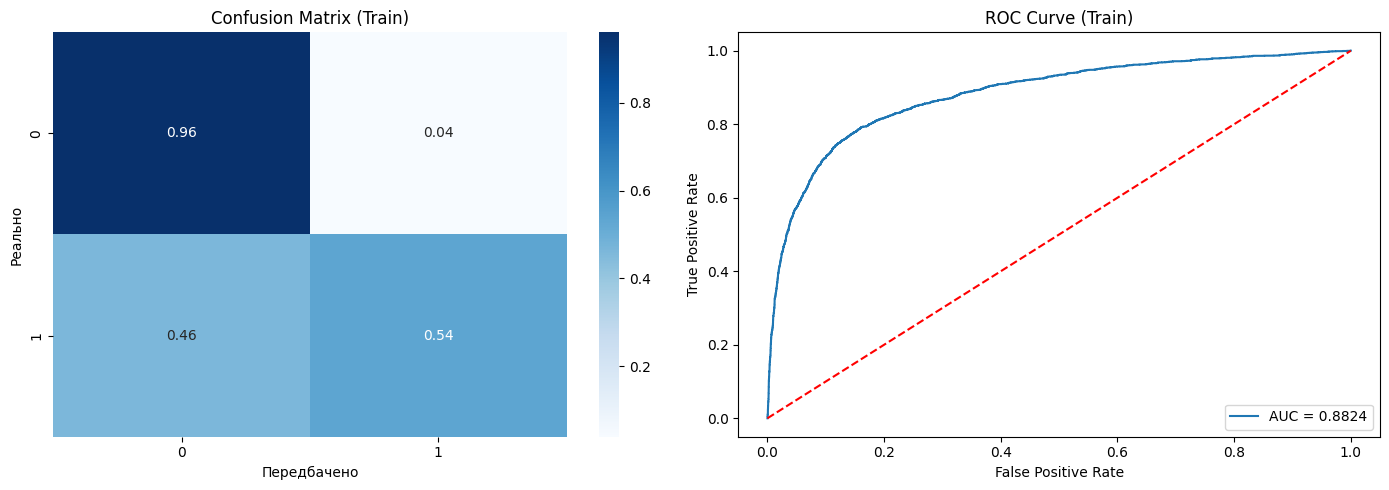

Метрики для Validation
AUROC: 0.8797
F1 Score: 0.6412

Детальний звіт класифікації:
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92      2390
         1.0       0.74      0.56      0.64       610

    accuracy                           0.87      3000
   macro avg       0.82      0.76      0.78      3000
weighted avg       0.86      0.87      0.86      3000



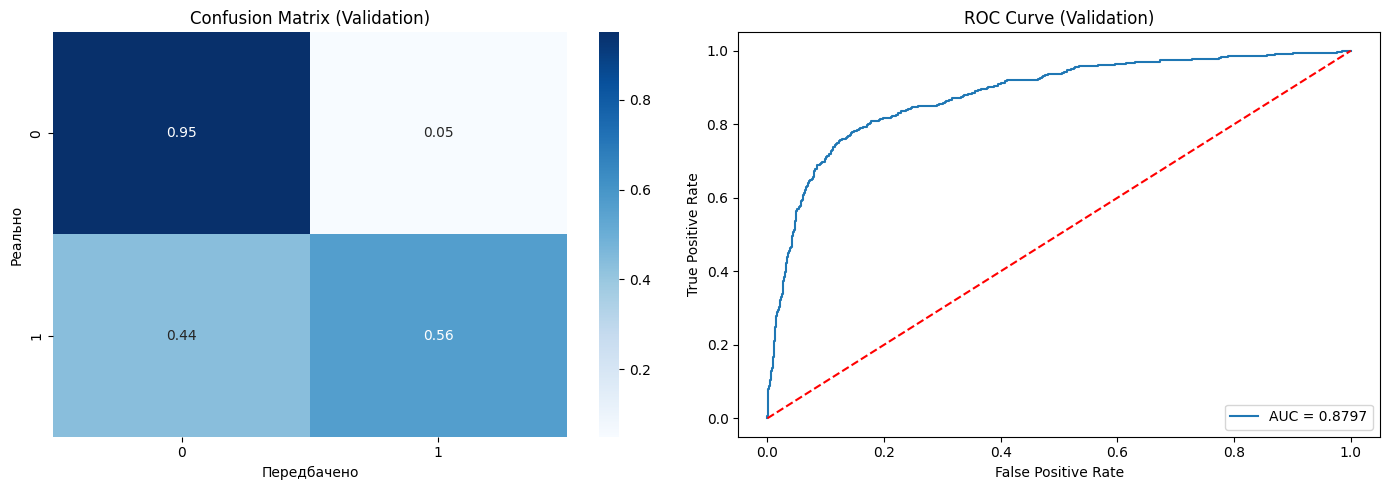

In [80]:
def evaluate_model(model, X, y, set_name=''):
  probs = model.predict_proba(X)[:, 1]
  preds = model.predict(X)

  auc = roc_auc_score(y, probs)
  f1 = f1_score(y, preds)

  print(f"Метрики для {set_name}")
  print(f"AUROC: {auc:.4f}")
  print(f"F1 Score: {f1:.4f}")
  print("\nДетальний звіт класифікації:")
  print(classification_report(y, preds))

  fig, ax = plt.subplots(1, 2, figsize=(14, 5))
  cm = confusion_matrix(y, preds, normalize='true')
  sns.heatmap(cm, annot=True, cmap='Blues', ax=ax[0])
  ax[0].set_title(f'Confusion Matrix ({set_name})')
  ax[0].set_xlabel('Передбачено')
  ax[0].set_ylabel('Реально')

  fpr, tpr, thresholds = roc_curve(y, probs)
  ax[1].plot(fpr, tpr, label=f'AUC = {auc:.4f}')
  ax[1].plot([0, 1], [0, 1], 'r--')
  ax[1].set_title(f'ROC Curve ({set_name})')
  ax[1].set_xlabel('False Positive Rate')
  ax[1].set_ylabel('True Positive Rate')
  ax[1].legend(loc='lower right')

  plt.tight_layout()
  plt.show()

evaluate_model(model, X_train, train_targets, 'Train')
evaluate_model(model, X_val, val_targets, 'Validation')

Метрики на тренувальних та валідаційних даних дуже близькі. AUROC близько 0.88 свідчить про те, що модель працює непогано, але пропускає частину клієнтів, які збираються піти.

8. Створіть передбачення моделі, яка передбачає завжди мажоритарний клас (той, якого більше в тренувальних даних). Порахуйте Accuracy на тренувальних та валідаційних даних для цієї моделі і тої, що ми натренували в п.6. Зробіть заключення про якість нашої моделі: якість хороша, погана, задовільна?

In [81]:
majority_class = train_targets.value_counts().idxmax()
print(f"Мажоритарний клас: {majority_class}")

train_preds_dummy = np.full(len(train_targets), majority_class)
val_preds_dummy = np.full(len(val_targets), majority_class)

train_acc_dummy = accuracy_score(train_targets, train_preds_dummy)
val_acc_dummy = accuracy_score(val_targets, val_preds_dummy)

train_acc_model = accuracy_score(train_targets, model.predict(X_train))
val_acc_model = accuracy_score(val_targets, model.predict(X_val))

print(f"\nТочність нової моделі (Train): {train_acc_dummy:.4f}")
print(f"Точність старої моделі (Train):   {train_acc_model:.4f}")
print(f"Точність нової моделі (Val):   {val_acc_dummy:.4f}")
print(f"Точність старої моделі (Val):     {val_acc_model:.4f}")

Мажоритарний клас: 0.0

Точність нової моделі (Train): 0.7965
Точність старої моделі (Train):   0.8742
Точність нової моделі (Val):   0.7967
Точність старої моделі (Val):     0.8717


У банку приблизно 80% клієнтів залишаються, а 20% йдуть. Модель показу 87,17%, тобто була знайдена певна закономірність, яка збільшила результат 7,17%. Якість задовільна.

9. Збережіть модель і інші обʼєкти, які ви хотіли б зберегти, з використанням бібліотеки joblib в файл `log_reg.joblib`. Потім завантажте модель з файлу в змінну `model_2` (цим ми тренуємось завантажувати модель з файлу на майбутнє).

In [82]:
bank_model_pack = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

joblib.dump(bank_model_pack, os.path.join(save_path, 'bank_model.joblib'))

loaded_data = joblib.load(os.path.join(save_path, 'bank_model.joblib'))
model_2 = loaded_data['model']
print(model_2)

LogisticRegression(random_state=42, solver='liblinear')


10. Ознайомтесь з роботою наведеної функції `predict_raw_df`. Ця функція робить підготовку даних (масштабування числових колонок і кодування категоріальних) і виводить ймовірності належності до класу 1 для кожного рядка в наданому наборі.

Доповніть або внесіть зміни у функцію з врахуванням вашого препроцесингу даних.

In [83]:
import warnings
warnings.filterwarnings("ignore")

def predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, input_df: pd.DataFrame):
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    prob = model.predict_proba(X_input)[:,1]
    return prob


In [84]:
predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, raw_df[:5])

array([0.00654092, 0.0366679 , 0.37111937, 0.37653484, 0.97577854])

In [85]:
def new_predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, input_df: pd.DataFrame):
  X_input = input_df.copy()
  X_input[numeric_cols] = scaler.transform(X_input[numeric_cols])
  encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
  X_input[encoded_cols] = encoder.transform(X_input[categorical_cols])
  X_final = X_input[numeric_cols + encoded_cols]
  pred = model.predict(X_final)
  prob = model.predict_proba(X_final)[:, 1]
  return pred, prob

preds, probs = new_predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, raw_df[:5])
display(preds, probs)

array([0., 0., 0., 0., 1.])

array([0.00654092, 0.0366679 , 0.37111937, 0.37653484, 0.97577854])

11. Зчитайте дані з `test.csv` в змінну `test_raw_df`. Зробіть передбачення для кожного рядка даних з функцією з попереднього завдання і запишіть результат в нову колонку `Exited` в датафреймі `test_raw_df`.

In [86]:
file_id_2 = '1qf2zCdQ1DExNaq6e3TGxQAmdq0uQWVGh'
url = f'https://drive.google.com/uc?id={file_id_2}'
test_raw_df = pd.read_csv(url)

test_preds, test_probs = new_predict_raw_df(
    scaler,
    encoder,
    numeric_cols,
    categorical_cols,
    test_raw_df
)

test_raw_df['Exited'] = test_preds
display(test_raw_df[['id', 'Surname', 'Exited']].head())

,id,Surname,Exited
0,15000,Chu,0.0
1,15001,Mazzi,0.0
2,15002,Onyekachi,0.0
3,15003,Martin,0.0
4,15004,Kenechukwu,0.0


12. Зчитайте файл 'sample_submission.csv' і зповніть колонку `Exited` передбаченими вашою моделлю значеннями для кожного відповідного `id` клієнта.
Виведіть перші 5 рядків фінального датасету, збережіть результат в файл `submission_log_reg.csv` (УВАГА! не запишіть випадково ще індекси рядків!) і здайте цей файл на Kaggle зі свого профіля натиснувши `Submit Prediction`.

In [87]:
submission_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample_submission.csv')

submission_df['Exited'] = test_preds
display(submission_df.head())
submission_df.to_csv('/content/drive/MyDrive/Colab Notebooks/submission_logistic.csv', index=False)

,id,Exited
0,15000,0.0
1,15001,0.0
2,15002,0.0
3,15003,0.0
4,15004,0.0
